# Final Project Visualization (50 points)

Do a shift-enter in all code blocks to execute.  You will need to enter commands in some before executing.  Each place where this is necessary, you will see the points awarded for correct completion.  This exercise will also help you to complte Module 14: Lab, which does not permit visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
print ("hello")

hello


You will need to be working in your home directory, not ses_350_data, which also contains your uploaded files find_stars.py and measure_stars.py.

In [2]:
from find_stars import find_stars
from measure_stars import measure_stars


Now, let's simulate some images and get to work.  The simulator inserts on special star, a star which is quite variable and is also periodic.Untitled2

30
(512, 512)


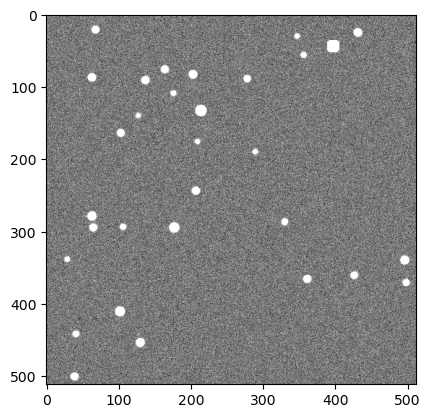

In [3]:
# get the data simulator
from simulate_image_stack import imsim_multi

data = imsim_multi()
print (len(data))
print (data[0].shape)

# stacked image for source detection
im0 = np.mean(data,axis=0)
plt.imshow(im0.clip(-30,30),cmap='gray')

At this point, you should not be able to spot the interesting star.  But it's in there! Let's find the stars in that image and measure the fluxes in all images.

In [4]:
# run your find_stars, add any other arguments if needed
sx,sy = find_stars(im0)

# 2d numpy array of the fluxes in each image and run measure_stars
N,M = len(data),len(sx)
flux = np.zeros((N,M),dtype='float32')

# run your measure_stars, add any other arguments if needed
for i in range(N):
    flux[i] = measure_stars(data[i],sx,sy)

Plot the time history ("lightcurve") for the first star detected.  It should look a little noisy.  You could make a plot like this for each star by replacing 0 with another integer.

Text(0, 0.5, 'Flux [counts]')

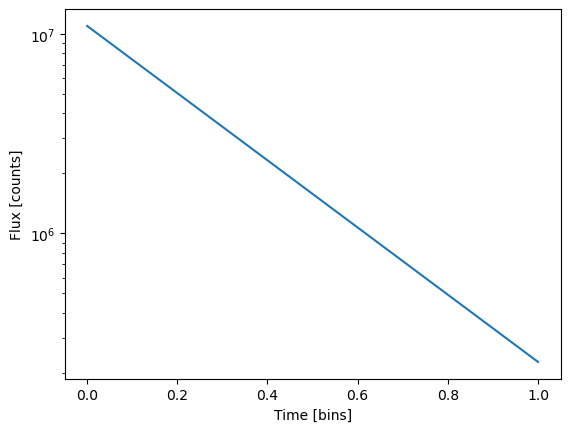

In [5]:
plt.plot(flux[4])
plt.semilogy()
plt.xlabel("Time [bins]")
plt.ylabel("Flux [counts]")

In this final phase of the final project, you will sort through your set of lightcurves to look for variability and periodicity.  We will first need to calculate the mean and variance for each lightcurve.

Text(0, 0.5, 'Flux Variance [counts]')

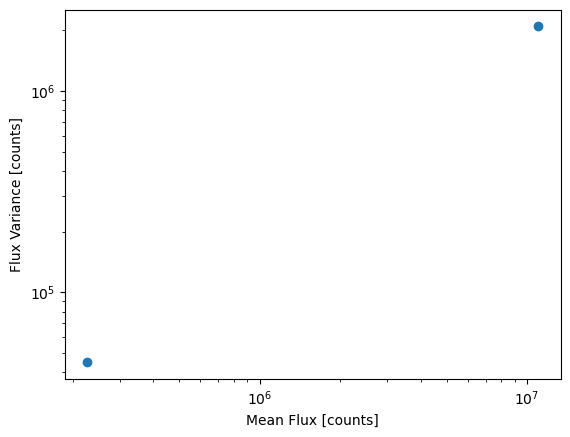

In [6]:
ff = flux.mean(axis=0)   # length M, mean flux for each star
vff = flux.var(axis=0)   # length M, flux variance for each star
plt.plot(ff,vff,'o')
plt.loglog()
plt.xlabel("Mean Flux [counts]")
plt.ylabel("Flux Variance [counts]")

Does one of those points look different from the rest?

## Identifying a Variable Star

First, let's calculate the power spectral density for each star, PSD.  This can be done with one call to fft, which calculates it for every star at once.

In [7]:
psd = np.abs( fft(flux-ff,axis=0)[:int(N/2)] )**2/(N*vff)

Let's plot the first one.

In [8]:
print (psd.shape)

(15, 2)


Text(0, 0.5, 'PSD')

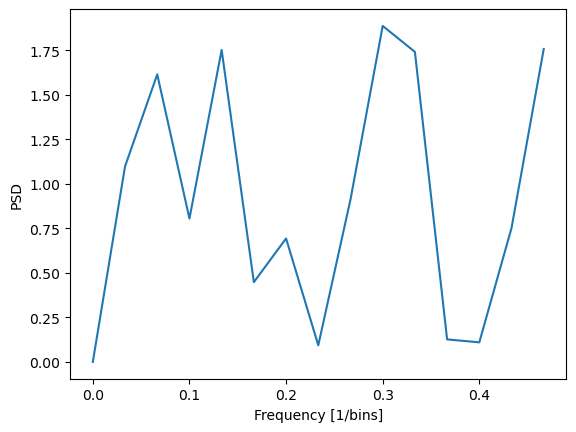

In [9]:
plt.plot (np.arange(N/2)/N,psd[:,0])
plt.xlabel("Frequency [1/bins]")
plt.ylabel("PSD")

If this is the periodic sources, there should be a large, narrow spike somewhere in the middle of the plot.  We probably have to look at more sources to find the interesting one.

### Looking at variability alone.

Make a histogram plot first of the variance over the mean.  Here, we're careful to clip low mean values.  Use the definition of y below and make a histogram plot.

In [10]:
y = vff/ff.clip(vff.min())

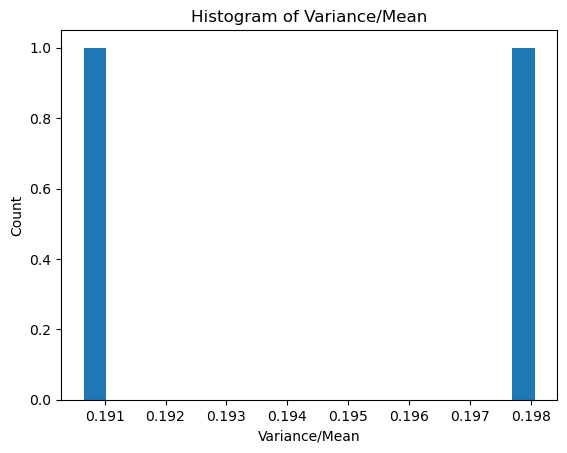

In [11]:
# make a histogram plot of y using plt.hist (10 points)

plt.hist(y, bins=20)
plt.xlabel("Variance/Mean")
plt.ylabel("Count")
plt.title("Histogram of Variance/Mean")
plt.show()

Do you see an interesting source?  Print out the 3 most variable:

In [12]:
s = y.argsort()[::-1]
for i in range(3):
    print ("Source ID {:-2d}, vff/ff: {:5.1f}".format(s[i],y[s[i]]))

Source ID  1, vff/ff:   0.2
Source ID  0, vff/ff:   0.2


IndexError: index 2 is out of bounds for axis 0 with size 2

Make a histogram plot next of the highest PSD peak.  Use the definition of y1 below and make another histogram plot.

In [ ]:
y1 = psd.max(axis=0)

In [ ]:
# make a histogram plot of y1 using plt.hist (10 points)
# Create a histogram plot of y1
plt.hist(y1, bins=20)
plt.xlabel("Highest PSD Peak")
plt.ylabel("Count")
plt.title("Histogram of Highest PSD Peaks")

# Display the histogram
plt.show()

Do you see an interesting source now?  Print out the 3 most variable.

In [ ]:
s = y1.argsort()[::-1]
for i in range(3):
    print ("Source ID {:-2d}, max(psd): {:5.1f}".format(s[i],y1[s[i]]))

Now make a scatter plot of y1 versus y.  Is there clearly something interesting there?

In [ ]:
# make a scatter plot of y1 versus y using plt.plot, create informative x and y axis labels (10 points)

plt.plot(y, y1, 'o', markersize=5, alpha=0.7)
plt.xlabel("Variance/Mean (vff/ff)")
plt.ylabel("Highest PSD Peak")
plt.title("Scatter Plot of Variance/Mean vs Highest PSD Peak")
plt.show()

Now, copy in your algorithm from Module 14: Lab in the zybook for finding the periodic source.

In [ ]:
#
# past your definition for find_periodic_source here and run with shift-enter (20 points)
#
#  if this is done correctly, the code blocks below can then be executed
#
# Warning: do not copy in the lines including and below if __name__ == "__main__":, because these are not part of the function.
#

def find_periodic_source(data):
    im0 = np.mean(data, axis=0)
    
    # Correct order: sx (columns), sy (rows)
    sx, sy = find_stars(im0)
    
    N, M = len(data), len(sx)
    flux = np.zeros((N, M), dtype='float32')
    
    for i in range(N):
        flux[i] = measure_stars(data[i], sx, sy)
    
    ff = flux.mean(axis=0)
    vff = flux.var(axis=0)
    
    # Compute PSD
    psd = np.abs(fft(flux - ff, axis=0)[:N//2])**2 / (N * vff)
    psd[0, :] = 0  # Exclude zero frequency component
    
    # Find maximum PSD and indices
    psdm = np.max(psd)
    i, j = np.unravel_index(np.argmax(psd), psd.shape)
    
    # Compute period and amplitude
    period = N / i
    amplitude = np.sqrt(psdm * vff[j] / N) * 2 / ff[j]
    
    return j, period, amplitude

j,period,ampl = find_periodic_source(data)

Finally, let's make plots of the periodic source.

In [ ]:
plt.plot (np.arange(N/2)/N,psd[:,j])
plt.xlabel("Frequency [1/bins]")
plt.ylabel("PSD")

You can now also plot the lightcurve and what's called the folded lightcurve.

In [ ]:
fig,ax=plt.subplots(2)
ax[0].plot(flux[:,j])
ax[1].plot((np.arange(30)/period)%1,flux[:,j],'o')

You should be able to see the periodic behavior in the top plot.  The bottom plot shows the data from the top plot "folded" onto the period, allowing you to see what happens during one cycle.

In [ ]:
print(f"Detected period: {period}")

In [ ]:
ax[1].plot((np.arange(30)/period)%1,flux[:,j],'o')